Trend in the sales of all four products during certain months

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df  = pd.read_csv('statsfinal.csv')
print(df.head())

   Unnamed: 0        Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2  \
0           0  13-06-2010  5422  3725   576   907  17187.74  23616.50   
1           1  14-06-2010  7047   779  3578  1574  22338.99   4938.86   
2           2  15-06-2010  1572  2082   595  1145   4983.24  13199.88   
3           3  16-06-2010  5657  2399  3140  1672  17932.69  15209.66   
4           4  17-06-2010  3668  3207  2184   708  11627.56  20332.38   

       S-P3      S-P4  
0   3121.92   6466.91  
1  19392.76  11222.62  
2   3224.90   8163.85  
3  17018.80  11921.36  
4  11837.28   5048.04  


In [3]:
print(df.info())     #to know data types of columns/
print('=======================')
print(df.describe()) #gives description of dataframe

print('=======================')
print(df.isnull().any().sum())  #to know if any nan is present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4600 non-null   int64  
 1   Date        4600 non-null   object 
 2   Q-P1        4600 non-null   int64  
 3   Q-P2        4600 non-null   int64  
 4   Q-P3        4600 non-null   int64  
 5   Q-P4        4600 non-null   int64  
 6   S-P1        4600 non-null   float64
 7   S-P2        4600 non-null   float64
 8   S-P3        4600 non-null   float64
 9   S-P4        4600 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 359.5+ KB
None
        Unnamed: 0         Q-P1         Q-P2         Q-P3         Q-P4  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean   2299.500000  4121.849130  2130.281522  3145.740000  1123.500000   
std    1328.049949  2244.271323  1089.783705  1671.832231   497.385676   
min       0.000000   254.000000   25

In [4]:
# To find maximum and minimum sold units
min_P1 = df['Q-P1'].min()
mean_P1 = df['Q-P1'].mean()
max_P1 = df['Q-P1'].max() 

min_P2 = df['Q-P2'].min()
mean_P2 = df['Q-P2'].mean()
max_P2 = df['Q-P2'].max() 

min_P3 = df['Q-P3'].min()
mean_P3 = df['Q-P3'].mean()
max_P3 = df['Q-P3'].max() 

min_P4 = df['Q-P4'].min()
mean_P4 = df['Q-P4'].mean()
max_P4 = df['Q-P4'].max() 


In [5]:
# product whose selling is more than mean in true or false
df['Q-P1'] > mean_P1
# Get Products list sold more than mean value
most_sold = df[df['Q-P1'] > mean_P1]
most_sold_high = df[df['Q-P1'] > (max_P1-1000)]


In [6]:
# as Date is in object dtype we need to convert it in datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  4600 non-null   int64         
 1   Date        4574 non-null   datetime64[ns]
 2   Q-P1        4600 non-null   int64         
 3   Q-P2        4600 non-null   int64         
 4   Q-P3        4600 non-null   int64         
 5   Q-P4        4600 non-null   int64         
 6   S-P1        4600 non-null   float64       
 7   S-P2        4600 non-null   float64       
 8   S-P3        4600 non-null   float64       
 9   S-P4        4600 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 359.5 KB


In [7]:
single_digit_month_rows = df[df['Date'].apply(lambda x: isinstance(x, str) and re.match(r'\d{2}-\d-\d{4}', x) is not None)].index

single_digit_month_rows

Index([], dtype='int64')

In [8]:
df[df.Date.isnull()].count() #count of improper date

Unnamed: 0    26
Date           0
Q-P1          26
Q-P2          26
Q-P3          26
Q-P4          26
S-P1          26
S-P2          26
S-P3          26
S-P4          26
dtype: int64

In [9]:
df = df.dropna(axis=0)   #droppping nan values

In [10]:
months = df['Date'].dt.month #get months for sorting
months

0       6
1       6
2       6
3       6
4       6
       ..
4595    1
4596    1
4597    2
4598    2
4599    2
Name: Date, Length: 4574, dtype: int32

In [11]:
df['month'] = months
df.head()


,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,month
0,0,2010-06-13,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,6
1,1,2010-06-14,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,6
2,2,2010-06-15,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,6
3,3,2010-06-16,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,6
4,4,2010-06-17,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,6


In [12]:
max_month = df.groupby(by=['month']).max()
max_month


,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
month,,,,,,,,,,
1,4596,2023-01-31,7990,3995,5992,1987,25328.30,25328.30,32476.64,14167.31
2,4599,2023-02-03,7965,3997,5993,1996,25249.05,25340.98,32482.06,14231.48
3,4291,2022-03-31,7936,3980,6000,2000,25157.12,25233.20,32520.00,14260.00
4,4321,2022-04-30,7992,3996,5986,1993,25334.64,25334.64,32444.12,14210.09
5,4352,2022-05-31,7990,3994,5971,1993,25328.30,25321.96,32362.82,14210.09
6,4382,2022-06-30,7938,3986,5924,1998,25163.46,25271.24,32108.08,14245.74
7,4413,2022-07-31,7994,3992,5990,1983,25340.98,25309.28,32465.80,14138.79
8,4443,2022-08-31,7996,3987,5995,1990,25347.32,25277.58,32492.90,14188.70
9,4473,2022-09-30,7987,3995,5998,2000,25318.79,25328.30,32509.16,14260.00


In [13]:
max_month['Q-P1'].idxmax()

12

In [14]:
for i in range(1,5):
    print("max sell on", max_month[f'Q-P{i}'].idxmax(),f"th month for Q-P{i}", ":", max_month[f'Q-P{i}'].max(), "units sold")

max sell on 12 th month for Q-P1 : 7998 units sold
max sell on 11 th month for Q-P2 : 3998 units sold
max sell on 3 th month for Q-P3 : 6000 units sold
max sell on 3 th month for Q-P4 : 2000 units sold


Out of all four products, which product has seen the highest sales in all the given years?

In [15]:
all_year = df[['Q-P1','Q-P2','Q-P3','Q-P4']].sum() #sum of all col to check who made the highest sale 
print(all_year)
print('=================')
print("highest sales in all the given years:",all_year.idxmax())

Q-P1    18860169
Q-P2     9741271
Q-P3    14379603
Q-P4     5139979
dtype: int64
highest sales in all the given years: Q-P1


An estimate on no: of units of each product that could be sold on 31st of Dec , every year , if all their retail centers were kept open.

In [16]:
# As it's considered that on 31st centers are closed there won't be any entry regarding it 
# Add 31 Dec for every year
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# 3. Find the date range
start_date = df['Date'].min()
end_date = df['Date'].max()

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")


Start Date: 2010-06-13 00:00:00
End Date: 2023-02-03 00:00:00


In [17]:
# Create a date range for the specified years
# date_range = pd.date_range(start=f"{start_year}-01-01", end=f"{end_year}-12-31")
expected_date_range = pd.date_range(start=start_date, end=end_date)

# Define the specific day and month you want to check (e.g., 31-12)
specific_date = pd.Timestamp("12-31")

# # Identify the missing dates
missing_dates = [date.date() for date in expected_date_range if date.day == specific_date.day and date.month == specific_date.month]

# # Display the missing dates without the timestamp part
print("Missing dates (31-12) in the specified year range:")
for date in missing_dates:
    print(date)



Missing dates (31-12) in the specified year range:
2010-12-31
2011-12-31
2012-12-31
2013-12-31
2014-12-31
2015-12-31
2016-12-31
2017-12-31
2018-12-31
2019-12-31
2020-12-31
2021-12-31
2022-12-31


In [18]:
df2 = pd.DataFrame({'Date': missing_dates}, )
df2.head()

,Date
0,2010-12-31
1,2011-12-31
2,2012-12-31
3,2013-12-31
4,2014-12-31


In [19]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y') #converting df2 Date to datetime
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 236.0 bytes


In [20]:
df3 = pd.concat([df, df2], ignore_index=True) #concating to add the missing values
df3

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,month
0,0.0,2010-06-13,5422.0,3725.0,576.0,907.0,17187.74,23616.50,3121.92,6466.91,6.0
1,1.0,2010-06-14,7047.0,779.0,3578.0,1574.0,22338.99,4938.86,19392.76,11222.62,6.0
2,2.0,2010-06-15,1572.0,2082.0,595.0,1145.0,4983.24,13199.88,3224.90,8163.85,6.0
3,3.0,2010-06-16,5657.0,2399.0,3140.0,1672.0,17932.69,15209.66,17018.80,11921.36,6.0
4,4.0,2010-06-17,3668.0,3207.0,2184.0,708.0,11627.56,20332.38,11837.28,5048.04,6.0
...,...,...,...,...,...,...,...,...,...,...,...
4582,NaN,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4583,NaN,2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4584,NaN,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4585,NaN,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df3[df3['Date']== '2020-12-31']

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,month
4584,NaN,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.columns

Index(['Unnamed: 0', 'Date', 'Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2',
       'S-P3', 'S-P4', 'month'],
      dtype='object')

In [23]:
#dropping unwanted columns
df3 = df3.drop("Unnamed: 0", axis='columns')


In [24]:
# checking for nan values
print(df3['Q-P1'].isnull().values.any())
print(df3['Q-P1'].isnull().sum())

True
13


In [37]:
# yearly_mean = df3[df3['Date'].dt.year==2010]
# df3[df3['Date'].dt.year==2010] = yearly_mean.fillna(yearly_mean['Q-P1'].mean())
# df3[df3['Date'].dt.year==2010]

In [38]:
df3['Q-P1'] = df3['Q-P1'].fillna(df3['Q-P1'].mean())
df3['Q-P2'] = df3['Q-P2'].fillna(df3['Q-P2'].mean())
df3['Q-P3'] = df3['Q-P3'].fillna(df3['Q-P3'].mean())
df3['Q-P4'] = df3['Q-P4'].fillna(df3['Q-P4'].mean())
df3

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,month
0,2010-06-13,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,6.0
1,2010-06-14,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,6.0
2,2010-06-15,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,6.0
3,2010-06-16,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,6.0
4,2010-06-17,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,6.0
...,...,...,...,...,...,...,...,...,...,...
4569,2023-01-30,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67,1.0
4570,2023-01-31,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43,1.0
4571,2023-02-01,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62,2.0
4572,2023-02-02,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21,2.0


In [39]:
# converting filled values to integer
df3 = df3.astype({"Q-P1":'int', "Q-P2":'int', "Q-P3":'int', "Q-P4":'int'})  
df3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4573
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4587 non-null   datetime64[ns]
 1   Q-P1    4587 non-null   int32         
 2   Q-P2    4587 non-null   int32         
 3   Q-P3    4587 non-null   int32         
 4   Q-P4    4587 non-null   int32         
 5   S-P1    4575 non-null   float64       
 6   S-P2    4575 non-null   float64       
 7   S-P3    4575 non-null   float64       
 8   S-P4    4575 non-null   float64       
 9   month   4575 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int32(4)
memory usage: 451.6 KB


In [40]:
df3.sort_values(by='Date', inplace = True)
print(df3)

           Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2      S-P3  \
0    2010-06-13  5422  3725   576   907  17187.74  23616.50   3121.92   
1    2010-06-14  7047   779  3578  1574  22338.99   4938.86  19392.76   
2    2010-06-15  1572  2082   595  1145   4983.24  13199.88   3224.90   
3    2010-06-16  5657  2399  3140  1672  17932.69  15209.66  17018.80   
4    2010-06-17  3668  3207  2184   708  11627.56  20332.38  11837.28   
...         ...   ...   ...   ...   ...       ...       ...       ...   
4569 2023-01-30  2476  3419   525  1359   7848.92  21676.46   2845.50   
4570 2023-01-31  7446   841  4825  1311  23603.82   5331.94  26151.50   
4571 2023-02-01  6289  3143  3588   474  19936.13  19926.62  19446.96   
4572 2023-02-02  3122  1188  5899   517   9896.74   7531.92  31972.58   
4573 2023-02-03  1234  3854  2321   406   3911.78  24434.36  12579.82   

          S-P4  month  
0      6466.91    6.0  
1     11222.62    6.0  
2      8163.85    6.0  
3     11921.36    6.0  
4  

In [28]:
df3['Date'] = pd.to_datetime(df3['Date'])

# Find rows with December 31st of every year
dec_31_rows = df3[df3['Date'].dt.month == 12][df3['Date'].dt.day == 31]

# Display the rows with December 31st
print(dec_31_rows)

           Date  Q-P1  Q-P2  Q-P3  Q-P4  S-P1  S-P2  S-P3  S-P4  month
4574 2010-12-31  4123  2129  3143  1123   NaN   NaN   NaN   NaN    NaN
4575 2011-12-31  4123  2129  3143  1123   NaN   NaN   NaN   NaN    NaN
4576 2012-12-31  4123  2129  3143  1123   NaN   NaN   NaN   NaN    NaN
4577 2013-12-31  4123  2129  3143  1123   NaN   NaN   NaN   NaN    NaN
4578 2014-12-31  4123  2129  3143  1123   NaN   NaN   NaN   NaN    NaN
4579 2015-12-31  4123  2129  3143  1123   NaN   NaN   NaN   NaN    NaN
4580 2016-12-31  4123  2129  3143  1123   NaN   NaN   NaN   NaN    NaN
4581 2017-12-31  4123  2129  3143  1123   NaN   NaN   NaN   NaN    NaN
4582 2018-12-31  4123  2129  3143  1123   NaN   NaN   NaN   NaN    NaN
4583 2019-12-31  4123  2129  3143  1123   NaN   NaN   NaN   NaN    NaN
4584 2020-12-31  4123  2129  3143  1123   NaN   NaN   NaN   NaN    NaN
4585 2021-12-31  4123  2129  3143  1123   NaN   NaN   NaN   NaN    NaN
4586 2022-12-31  4123  2129  3143  1123   NaN   NaN   NaN   NaN    NaN


C:\Users\Arati\AppData\Local\Temp\ipykernel_19008\3433607372.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dec_31_rows = df3[df3['Date'].dt.month == 12][df3['Date'].dt.day == 31]


Dropping the production of any one of the products by analysing the data 

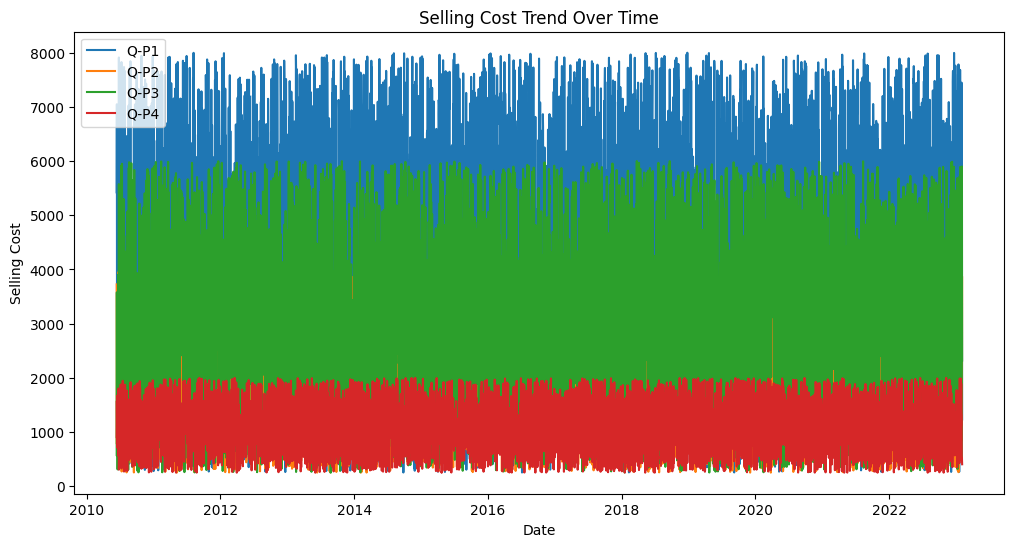

In [41]:
# Set the 'Date' column as the index for time series plotting
df3.set_index('Date', inplace=True)

# Create a line plot to observe the trend of selling costs over time
plt.figure(figsize=(12, 6))
plt.plot(df3.index, df3['Q-P1'], label='Q-P1')
plt.plot(df3.index, df3['Q-P2'], label='Q-P2')
plt.plot(df3.index, df3['Q-P3'], label='Q-P3')
plt.plot(df3.index, df3['Q-P4'], label='Q-P4')

plt.title('Selling Cost Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Selling Cost')
plt.legend()

plt.show()

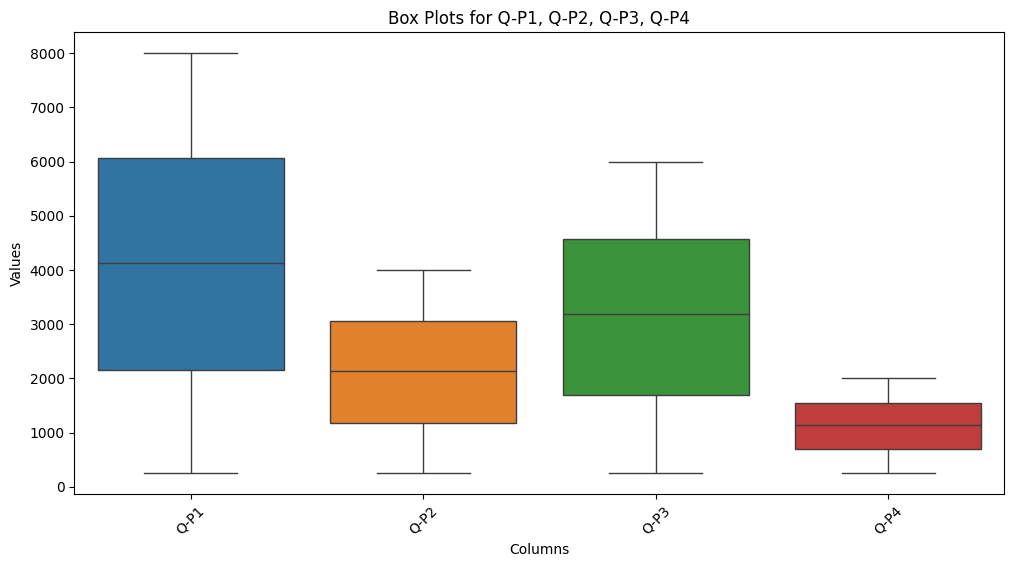

In [47]:
##Visualizing the data to decide which product should be dropped
columns_to_plot = ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']

# Create box plots using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3[columns_to_plot])
plt.title('Box Plots for Q-P1, Q-P2, Q-P3, Q-P4')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()




In [ ]:
# here Q-P4 can be dropped or discontinued